<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#My-first-profile" data-toc-modified-id="My-first-profile-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>My first profile</a></span><ul class="toc-item"><li><span><a href="#Add-voters" data-toc-modified-id="Add-voters-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Add voters</a></span></li><li><span><a href="#Plot-the-profile" data-toc-modified-id="Plot-the-profile-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Plot the profile</a></span></li><li><span><a href="#Plot-the-candidates" data-toc-modified-id="Plot-the-candidates-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Plot the candidates</a></span></li></ul></li><li><span><a href="#Dilatate-profile" data-toc-modified-id="Dilatate-profile-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Dilatate profile</a></span></li><li><span><a href="#Copy-profile" data-toc-modified-id="Copy-profile-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Copy profile</a></span></li></ul></div>

In this Notebook, I will explain how to create a profile of voter with embeddings.

In [17]:
import embedded_voting as ev
import numpy as np

# My first profile

Let's create a profile of voter for an election with $m = 6$ candidates and $d = 3$ dimensions for the embeddings

In [2]:
my_profile = ev.Profile(6,3)

## Add voters

There is several way to create a profile of voters.

First, you can add a group of voter by manually specifying the embeddings and the preferences of theses voters. The embeddings are automatically normalized (unless you specify otherwise)

In [10]:
embeddings = np.array([[.9,0,.1],
              [.8,.1,0],
              [.1,.1,.9],
              [0,.2,.8],
              [0,1,0],
              [.2,.3,.2],
              [.5,.1,.9]])
scores = np.random.rand(7, 6)
my_profile.add_voters(embeddings, scores)

I can also add voters one by one :

In [11]:
for i in range(10):
    embedding = [.8,.2,.2] + np.random.randn(3)*0.02
    score = np.random.randn(6)
    my_profile.add_voter(embedding, score)

I can also add voters uniformy distributed :

In [14]:
my_profile.uniform_distribution(10)

Then I can plot my profile of voter on a 3D space

## Plot the profile

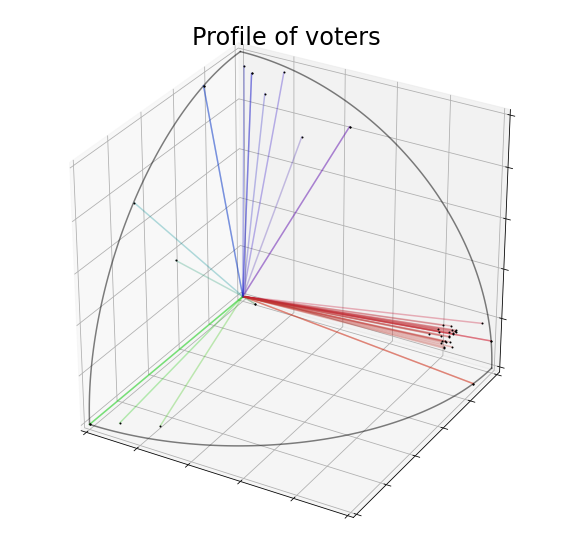

In [15]:
my_profile.plot_profile_3D()

You can also plot it on a ternary plot :

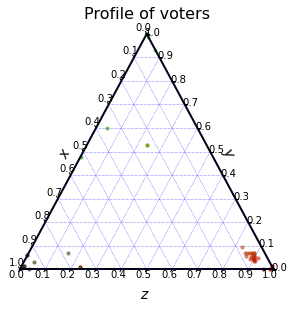

TernaryAxesSubplot: 153758308367

In [16]:
my_profile.plot_profile_2D()

## Plot the candidates

# Dilatate profile

# Copy profile